<a href="https://colab.research.google.com/github/zakariajaadi/data-science-portofolio/blob/main/Student's%20t-test%20Hypothesis%20Testing%20with%20Scipy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
## Defintion of one-sample t-test
The one-sample t-test is a statistical hypothesis test used to determine whether an **unknown** population mean $\mu$ is different from a specific hypothetized value $\mu_0$


## One sample t-test assumptions

For a valid test, data values should be:

1. **Continuous and independent:** Can take any value within a range and values are not related to one another
2. **Normal:** Data is nearly normally distributed or normally distributed.
3. **Random:** Data is randomly sampled from the population of interest. This ensures the sample is representative.


# One-Sample t-test Implementation for Class Performance (with Scipy)

This notebooks uses a one-sample t-test to analyze class performance. We’ll compare a class's average exam score to a national average of 75 to determine if the difference is statistically significant. This test helps assess whether the observed difference is meaningful or due to chance.

## 1. Our data

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1. Our class test scores (we assume there indepenence)
class_scores = np.array([78, 82, 90, 70, 75, 85, 68, 92, 77, 80, 88, 73, 79, 81, 83, 76, 87, 72, 95, 65, 89, 74, 91, 69, 84])

# 2. National average (population mean)
national_average = 75

## 2. Assumptions check
Normality check

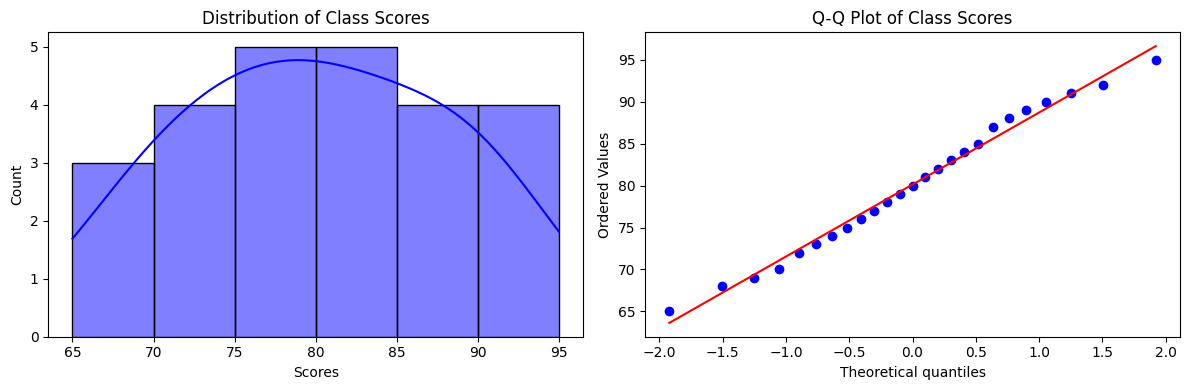

In [20]:
# @title
# Create a figure
plt.figure(figsize=(12, 4))

# Plot 1: Histogram with KDE (using plt.subplot for the first plot)
plt.subplot(1, 2, 1)
sns.histplot(class_scores, color='blue', kde=True)
plt.title('Distribution of Class Scores')
plt.xlabel('Scores')

# Plot 2: Q-Q Plot (using plt.subplot for the second plot)
plt.subplot(1, 2, 2)
stats.probplot(class_scores, dist="norm", plot=plt)
plt.title('Q-Q Plot of Class Scores')

# Adjust spacing between subplots
plt.tight_layout()
plt.show()



> Data is likely normal 👍


Are other assumptions also met ?


> Independence: The class scores are intrinsically independent, as each student's performance is unrelated to others.

> Random Sampling: We assume that the class was randomly formed

> Continuity : class scores data is discrete, but has a large range and behaves similarly to a continuous variable





## 3. Run the one sample t-test (p-value approach)


In [30]:
# Set alpha the significance level (probability of type I error: rejecting H0 when it's actually true)
alpha = 0.05 #means 5% risk and 95% confidence level

# 3. Perform the one-sample t-test
t_statistic, p_value = stats.ttest_1samp(class_scores, national_average)

# 4. Print the results
print(f"T-statistic: {t_statistic:.2f}, P-value: {p_value:.3f}")

# 5. Interpret the results
if p_value < alpha:
    print("The class performed significantly differently from the national average.")
    if t_statistic > 0 :
        print("The class performed significantly better than the national average.")
    else:
        print("The class performed significantly worse than the national average.")
else:
    print("There is no significant difference between the class's performance and the national average.")

T-statistic: 3.10, P-value: 0.005
The class performed significantly differently from the national average.
The class performed significantly better than the national average.


# Et Voila ! 🎉

## 4. Bonus 🎁: Run the one sample t-test (Critical-t approach)


**Critical-t definition** is a threshold for t-statistic under $H_0$, and expresses how many standard errors the sample mean can deviate from the population mean

**Rejection region:** in a two-tailed, we reject $H_0$ if  $t_{\text{statistic}} > t_{\text{critical}}$ (positive tail) or less than $ t_{\text{statistic}} < -t_{\text{critical}}$ (negative tail).

$$rejection formula:|t_{\text{statistic}}| > t_{\text{critical}}$$

calculate critical t-values using ```scipy.stats.t.ppf```



In [7]:
#significance/risk level
alpha=0.05
# Degrees of freedom (n - 1)
df = len(class_scores) - 1

#
t_statistic,_ = stats.ttest_1samp(class_scores, national_average)

# Critical t-value (two-tailed test)
critical_t = stats.t.ppf(1 - alpha/2, df)

# 5. Interpret the results
if abs(t_statistic) > critical_t:
    print("The class performed significantly differently from the national average.")
    if t_statistic > 0:
        print("The class performed significantly better than the national average.")
    else:
        print("The class performed significantly worse than the national average.")
else:
    print("There is no significant difference between the class's performance and the national average.")


The class performed significantly differently from the national average.
The class performed significantly better than the national average.


## 5. Double bonus 💝: Critical-t approach (Visual)

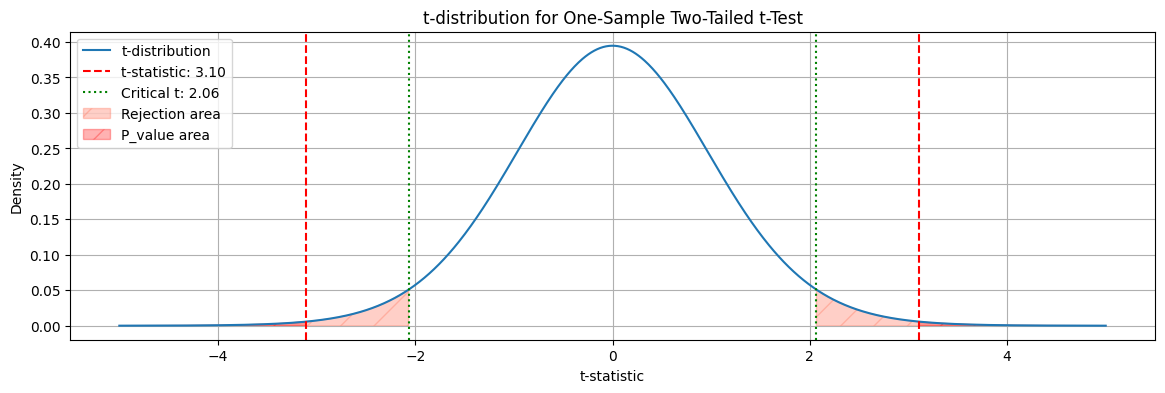

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))

# Plotting the t-distribution curve
x = np.linspace(-5, 5, 1000)
t_dist = stats.t.pdf(x, df)

# Plot the t-distribution curve
plt.plot(x, t_dist, label="t-distribution")
plt.title("t-distribution for One-Sample Two-Tailed t-Test")
plt.xlabel("t-statistic")
plt.ylabel("Density")

# Adding the observed t-statistic
plt.axvline(t_statistic, color='r', linestyle='--', label=f't-statistic: {t_statistic:.2f}')
plt.axvline(-t_statistic, color='r', linestyle='--')

plt.axvline(critical_t, color='green', linestyle=':', label=f'Critical t: {critical_t:.2f}')
plt.axvline(-critical_t, color='green', linestyle=':')

# For two-tailed test, we shade the areas in both tails
plt.fill_between(x, t_dist, where=(x <= -critical_t) | (x >= critical_t), color='tomato',hatch="/", alpha=0.3,label="Rejection area")

# For two-tailed test, we shade the areas in both tails
plt.fill_between(x, t_dist, where=(x <= -t_statistic) | (x >= t_statistic), color='red',hatch="/", alpha=0.3, label="P_value area")


# Adding labels
plt.legend(loc='upper left')
plt.grid(True)

# Show plot
plt.show()


**Interpretation :** The t-statistic (3.10) falls outside the critical t-values (±2.06), placing it within the rejection region. This indicates strong evidence (p < 0.05) to reject the null hypothesis.  We can conclude that the class performed significantly differently from the national average.  Specifically, the positive t-statistic indicates that the class performed significantly better than the national average. 🏆

# Voili Voilou! 🎉